In [5]:
import pandas as pd

# Load data
df = pd.read_excel("Road Accident Data.xlsx", sheet_name="Data")

# Convert date and time
df['Accident_Date'] = pd.to_datetime(df['Accident Date'])
df['Year'] = df['Accident_Date'].dt.year
df['Month'] = df['Accident_Date'].dt.month
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Fill missing values or drop rows if needed
df = df.dropna(subset=['Latitude', 'Longitude', 'Accident_Severity'])


In [6]:
# Basic counts
print(df['Accident_Severity'].value_counts())
print(df['Vehicle_Type'].value_counts())
print(df.groupby('Year')['Accident_Index'].count())


Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64
Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64
Year
2021    163554
2022    144419
Name: Accident_Index, dtype: int64


In [7]:
import folium
from folium.plugins import HeatMap

# Filter serious/slight/fatal accidents
map_data = df[['Latitude', 'Longitude']].dropna()

# Create map
m = folium.Map(location=[map_data['Latitude'].mean(), map_data['Longitude'].mean()], zoom_start=12)
HeatMap(map_data.values.tolist(), radius=10).add_to(m)

m.save("accident_heatmap.html")  # Open in browser


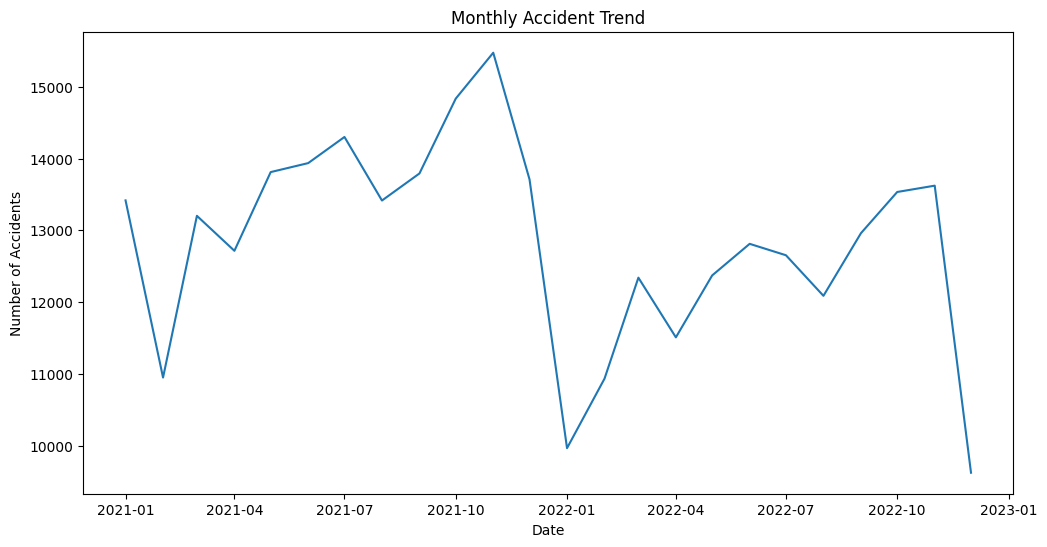

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accidents per month
monthly_trend = df.groupby(['Year', 'Month'])['Accident_Index'].count().reset_index()
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(DAY=1))

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x='Date', y='Accident_Index')
plt.title("Monthly Accident Trend")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.show()


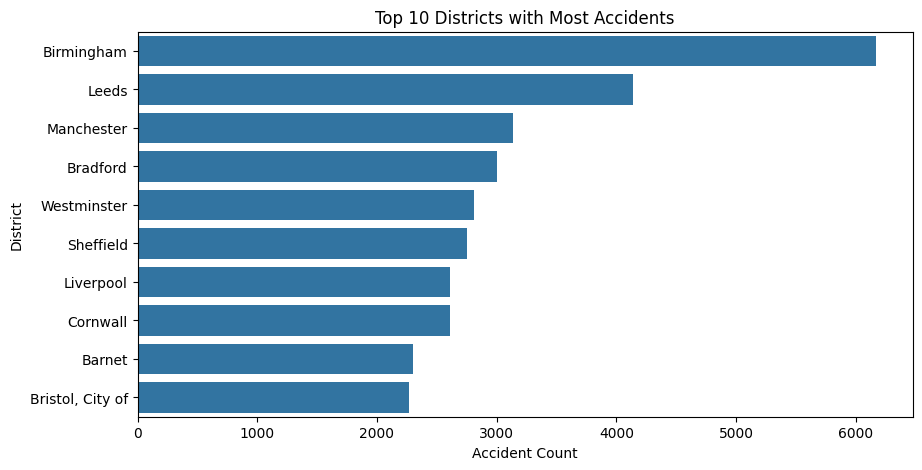

In [9]:
top_districts = df['Local_Authority_(District)'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_districts.values, y=top_districts.index)
plt.title("Top 10 Districts with Most Accidents")
plt.xlabel("Accident Count")
plt.ylabel("District")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Dummy Data
X = pd.DataFrame({'Speed': [30, 40, 50], 'Hour': [10, 15, 20]})
y = pd.Series([0, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))

X_train shape: (2, 2)
X_test shape: (1, 2)
y_train shape: (2,)
y_test shape: (1,)
Model Accuracy: 0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.0


In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
 [[0 1]
 [0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

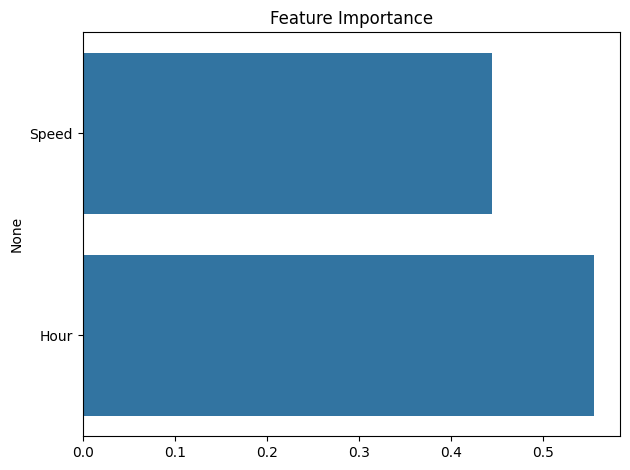

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score, KFold

# Change n_splits to 3 or less (e.g., 3, 2)
kf = KFold(n_splits=3)  # Or n_splits=len(y.unique()) to adjust to number of unique classes
scores = cross_val_score(model, X, y, cv=kf)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.0


In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'n_estimators': [50, 100, 150]}

# Use StratifiedKFold with n_splits=2 for cross-validation
# and shuffle=True for randomization
# since the size of the dataset is too small for proper KFold cross-validation
# StratifiedKFold ensures each fold has the same proportion of target classes as the original dataset.
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
grid.fit(X, y)  # Fit on the entire dataset (X, y)

print("Best Params:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Params: {'n_estimators': 50}
